Importing diffrent libraries for use later

In [805]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

Setting variables for the data and changing the initial data from strings to integers using redht encoding

In [806]:
df = pd.read_csv('star_classification.csv', engine='python')
df = pd.DataFrame(df)



q_low = df['z'].quantile(0.02)
q_hi  = df['z'].quantile(0.99)

df = df.loc[(df['z'] < q_hi) & (df['z'] >q_low)]


q_low = df['redshift'].quantile(0.02)
q_hi  = df['redshift'].quantile(0.99)

df = df.loc[(df['redshift'] < q_hi) & (df['redshift'] >q_low)]

classification = df['class']
classification = classification.replace("GALAXY", 0)
classification = classification.replace("STAR", 1)
classification = classification.replace("QSO", 2)

#df.drop(df[df['z'] < -1000].index, inplace = True)




goals = np.array(df['class'])

df = df.drop(['class'], axis = 1)
df = df.drop(['obj_ID'], axis = 1)
df = df.drop(['run_ID'], axis = 1)
df = df.drop(['rerun_ID'], axis = 1)
df = df.drop(['field_ID'], axis = 1)
df = df.drop(['spec_obj_ID'], axis = 1)
df = df.drop(['MJD'], axis = 1)
df = df.drop(['fiber_ID'], axis = 1)
df = df.drop(['cam_col'], axis = 1)
df = df.drop(['g'], axis = 1)
df = df.drop(['plate'],axis = 1)
df = df.drop(['u'], axis = 1)


# https://datatofish.com/correlation-matrix-pandas/


array([[<AxesSubplot:title={'center':'alpha'}>]], dtype=object)

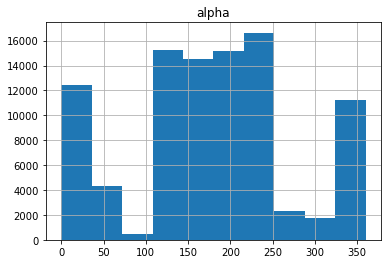

In [807]:
# Histogram of each column visualized
df.hist(column='alpha')

array([[<AxesSubplot:title={'center':'delta'}>]], dtype=object)

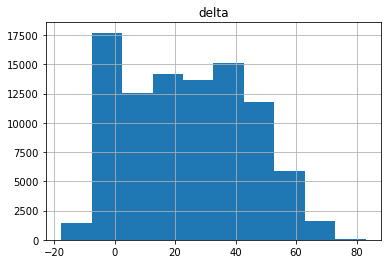

In [808]:
df.hist(column='delta')

In [809]:
#df.hist(column='u')

array([[<AxesSubplot:title={'center':'r'}>]], dtype=object)

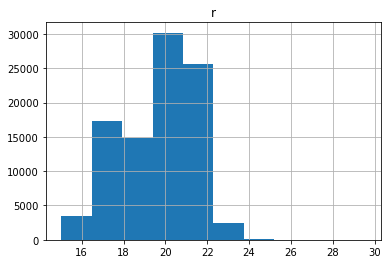

In [810]:
df.hist(column='r')

array([[<AxesSubplot:title={'center':'i'}>]], dtype=object)

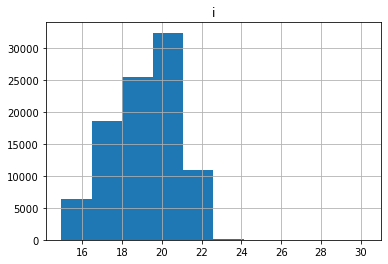

In [811]:
df.hist(column='i')

array([[<AxesSubplot:title={'center':'z'}>]], dtype=object)

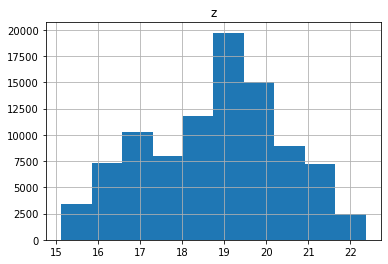

In [812]:
df.hist(column='z')

array([[<AxesSubplot:title={'center':'redshift'}>]], dtype=object)

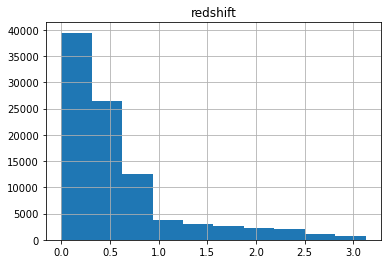

In [813]:
df.hist(column='redshift')

In [815]:
corrMatrix = df.corr()

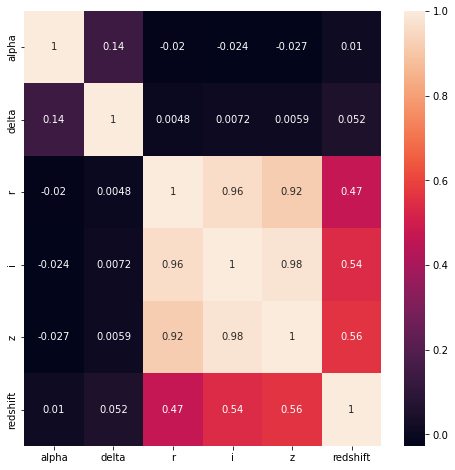

In [816]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Implementing the randome forest algorithum 

In [799]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

#lable_cols = list(df.columns) # getting the lables for all used coloumns 

df = np.array(df) # changing the data from csv to an array for easier usage in training

#splitting the data into testing and training data
trainingData, testingData, trainingLabels, testingLabels = train_test_split(np.array(df), classification, test_size = 0.1, random_state = 20)

#importing the sklearn random forest model
from sklearn.ensemble import RandomForestClassifier

#initializign he random forest model with up to 1000 decision trees and in the same randome state as the splitting data
rf = RandomForestClassifier(n_estimators = 1000, random_state = 20, oob_score = True)

rf.fit(trainingData, trainingLabels);

# Use the forest's predict method on the test data
predictions = rf.predict(testingData)

predictionsTraining = np.argmax(rf.oob_decision_function_, axis = 1)
# Calculate the absolute errors
errors = abs(predictions - testingLabels)

# Print out the mean absolute error (mae)
print(errors)

# Classification report for the training set and the test set



In [800]:
print(errors)

83191    0
58292    0
36915    0
89464    0
30712    0
        ..
98035    0
78398    0
47685    0
11855    0
42989    0
Name: class, Length: 9409, dtype: int64


In [801]:
total = 0
val = 0
for item in errors:
    if item != 0:
        total +=1
        val += (item)
print(total)
print(val)

223
434


In [802]:
from sklearn import metrics
# bias variance tradeoff

# Test Set
# Print the confusion matrix
print(metrics.confusion_matrix(testingLabels, predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(testingLabels, predictions, digits=3))

[[5656   10   63]
 [   2 1831    0]
 [ 148    0 1699]]
              precision    recall  f1-score   support

           0      0.974     0.987     0.981      5729
           1      0.995     0.999     0.997      1833
           2      0.964     0.920     0.942      1847

    accuracy                          0.976      9409
   macro avg      0.978     0.969     0.973      9409
weighted avg      0.976     0.976     0.976      9409



In [803]:
#Training Set
# Print the confusion matrix
cm = metrics.confusion_matrix(trainingLabels, predictionsTraining)
print(cm)

# Print the precision and recall, among other metrics
print(metrics.classification_report(trainingLabels, predictionsTraining, digits=3))

[[51285    87   563]
 [   15 16870     0]
 [ 1329     2 14530]]
              precision    recall  f1-score   support

           0      0.974     0.987     0.981     51935
           1      0.995     0.999     0.997     16885
           2      0.963     0.916     0.939     15861

    accuracy                          0.976     84681
   macro avg      0.977     0.968     0.972     84681
weighted avg      0.976     0.976     0.976     84681



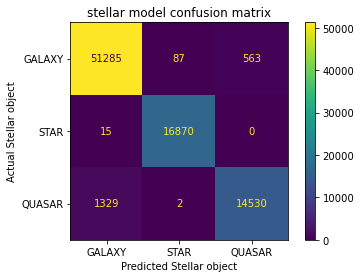

In [804]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['GALAXY', 'STAR', 'QUASAR'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='stellar model confusion matrix', 
                xlabel='Predicted Stellar object', 
                ylabel='Actual Stellar object')

plt.show()